#KNN

It is a Supervised ML Algorithm.
It is a non-parametric method, meaning it does not make any assumptions about the underlying data distribution

##KNN Classification

For classification, KNN assigns the class label to the new data point based on the majority class among its k nearest neighbors. The class with the highest frequency among the neighbors is chosen as the predicted class.

 KNN must be avoided, in scenarios where the decision boundary is irregular or where the data is not linearly separable.<br> Also, it can be computationally expensive for large datasets since it requires storing and calculating distances for all training examples during prediction.<br>Dataset must be nearly balanced otherwise KNN may not give correct results.<br>Also not very robust to outliers.<br>
 Also it does not tell the contribution of each feature in predicting the output

**k**: The number of nearest neighbors to consider.<br> Smaller k -- may lead to noisy predictions and can lead to **overfitting** and often shows High variance <br> Larger k -- may smooth out the decision boundary and can lead to **underfitting** and shows High Bias

In [3]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs, make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import heapq                          # To reduce the time complexity
from collections import Counter

In [33]:
# Generate the data
X_trainc, y_trainc = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)

<ipython-input-34-7ccef9abf10a>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_trainc[y_trainc == 0, 0], X_trainc[y_trainc == 0, 1], c='blue', s=40, cmap='winter', label='Class 0')
<ipython-input-34-7ccef9abf10a>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_trainc[y_trainc == 1, 0], X_trainc[y_trainc == 1, 1], c='red', s=40, cmap='winter', label='Class 1')


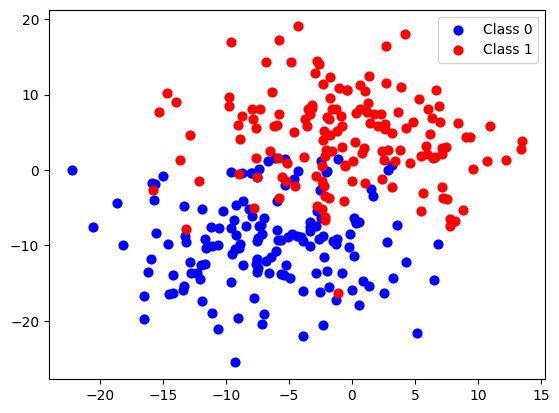

In [34]:
plt.scatter(X_trainc[y_trainc == 0, 0], X_trainc[y_trainc == 0, 1], c='blue', s=40, cmap='winter', label='Class 0')
plt.scatter(X_trainc[y_trainc == 1, 0], X_trainc[y_trainc == 1, 1], c='red', s=40, cmap='winter', label='Class 1')
plt.legend()
plt.show()

In [35]:
def normalize(X):           #Normalization
  x1_min = min(X_trainc[:,0])
  x1_max = max(X_trainc[:,0])

  f = lambda x: (x - x1_min)/(x1_max - x1_min)
  X[:,0] = f(X[:,0])

  x2_min = min(X_trainc[:,1])
  x2_max = max(X_trainc[:,1])

  f = lambda x: (x - x2_min)/(x2_max - x2_min)
  X[:,1] = f(X[:,1])

  return X

In [36]:
X = normalize(X_trainc)
print(X[0:5])

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


In [37]:
newpts = np.array([[-10,-10],[0,10],[-15,10],[5,-2]])
newpts = normalize(newpts)

In [38]:
class KNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbors_labels = self.y_train[nearest_neighbors_indices]
            predicted_label = np.bincount(nearest_neighbors_labels).argmax()
            predictions.append(predicted_label)
        return np.array(predictions)

In [39]:
knnc= KNNClassifier()
knnc.fit(X_trainc,y_trainc)
knnc.predict(newpts)

array([0, 1, 1, 0])

In [15]:
# def find_neighbors(k, X_tr, newpt):
#   n_arr = []
#   for i in range(len(X_tr)):
#     #dist = np.sqrt(np.sum(np.square(X_tr[i]-newpt)))
#     dist = np.linalg.norm(X_tr[i] - newpt)
#     n_arr.append([i,dist])
#   n_arr = sorted(n_arr, key = lambda x : x[1])
#   return n_arr[0:k]
# def classifier(neighbor_arr):
#   class_arr = [y_train[i[0]] for i in neighbor_arr]
#   return Counter(class_arr).most_common(1)[0][0]

In [44]:
def find_neighbors(k, X_tr, newpt):
    heap = []
    for i in range(len(X_tr)):
        dist = np.linalg.norm(X_tr[i] - newpt)
        heapq.heappush(heap, (dist, i))

    neighbors = heapq.nsmallest(k, heap)
    return neighbors

def classifier(neighbor_arr):
    class_arr = [y_trainc[i[1]] for i in neighbor_arr]
    return Counter(class_arr).most_common(1)[0][0]

In [45]:
for i in range(len(newpts)):
  knn = find_neighbors(4,X,newpts[i])
  print(classifier(knn),end = " ")

0 1 1 0 

Verified with the predefined class

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_trainc,y_trainc)

KNeighborsClassifier(n_neighbors=4)

In [43]:
y_pred = KNN.predict(newpts)
y_pred

array([0, 1, 1, 0])

##KNN Regression

For regression tasks, instead of voting, KNN predicts the average of the target values of its k nearest neighbors.

In [24]:
X_train, y_train = make_regression(n_samples = 300, n_features = 2, n_informative = 2, noise = 5, bias = 30, random_state = 200)

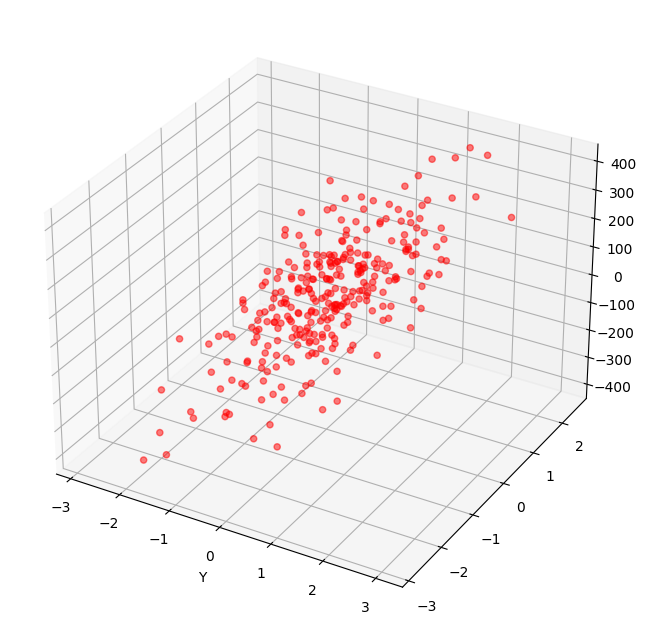

In [25]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(111,projection = '3d')
ax.scatter(X_train[:,0],X_train[:,1],y_train, c = 'r',alpha = 0.5, marker = 'o')
ax.set_xlabel('X1')
ax.set_xlabel('X2')
ax.set_xlabel('Y')
plt.show()

In [26]:
newpts1 = np.array([[-1,1],[0,2],[-3,2],[3,-3]])

In [27]:
class KNNRegressor:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbors_values = self.y_train[nearest_neighbors_indices]
            predicted_value = np.mean(nearest_neighbors_values)
            predictions.append(predicted_value)
        return np.array(predictions)

In [28]:
knnr= KNNRegressor()
knnr.fit(X_train,y_train)
knnr.predict(newpts1)

array([ 29.15851353, 214.23754158,  23.8536024 ,  -5.88687978])

In [29]:
from sklearn.neighbors import KNeighborsRegressor
KNNr = KNeighborsRegressor(n_neighbors=3)
KNNr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
KNNr.predict(newpts1)

array([ 29.15851353, 214.23754158,  23.8536024 ,  -5.88687978])

#Helper functions

In [21]:
arr = np.array([40, 10, 30, 20])

# Get the indices that would sort the array
sorted_indices = np.argsort(arr)

print("Original Array:", arr)
print("Sorted Indices:", sorted_indices)


Original Array: [40 10 30 20]
Sorted Indices: [1 3 2 0]


In [20]:
#np.argmin(arr) returns the index of the minimum value in the flattened array.
arr1 = np.array([4, 2, 0])
arr2 = np.array([[-1, 2, 7],
                [3, 5, 1]])

# Find the index of the minimum value along the specified axis
min_index1 = np.argmin(arr1)
min_index2 = np.argmin(arr2,axis = 1)

print(min_index1, min_index2) # 2 for 0 and 5 for 1


2 [0 2]


In [19]:
arr = np.array([0, 1, 1, 2, 2, 2])
# Count occurrences of each integer in the array
counts = np.bincount(arr)
print("Original Array:", arr)
print("Counts:", counts)

Original Array: [0 1 1 2 2 2]
Counts: [1 2 3]


In [18]:
import heapq
def findKthLargest(nums, k):
    num = nums[:k]
    heapq.heapify(num)
    for i in nums[k:]:
        if i > num[0]:
            heapq.heappushpop(num,i)
            print(num)
    return num[0]

n = [3,2,3,1,2,4,5,5,6]
k = 4
findKthLargest(n,k)

[2, 2, 3, 3]
[2, 3, 3, 4]
[3, 3, 5, 4]
[3, 4, 5, 5]
[4, 5, 5, 6]


4

In [22]:
min_heap = []
heapq.heapify(min_heap)  # Convert a list into a min-heap

# Insert elements into the min-heap
heapq.heappush(min_heap, 18)
heapq.heappush(min_heap, 7)
heapq.heappush(min_heap, 12)
heapq.heappush(min_heap, 9)
heapq.heappush(min_heap, 15)

print(min_heap)

# Extract the minimum element
min_element = heapq.heappop(min_heap)
print("Min-Heap (smallest element extracted):", min_element)

[7, 9, 12, 18, 15]
Min-Heap (smallest element extracted): 7


In [23]:
max_heap = []
for value in [5, 2, 8, 1]:
    heapq.heappush(max_heap, -value)
print(max_heap)
# Extract the maximum element (by negating it)
max_element = -heapq.heappop(max_heap)
print("Max-Heap (largest element extracted):", max_element)


[-8, -2, -5, -1]
Max-Heap (largest element extracted): 8


##Implementing KNN on Social Networking Ads Data

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X_tr, Xt, y_tr, yt = train_test_split(data.iloc[:,2:4].values, data.iloc[:,-1].values, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
Xt = scaler.transform(Xt)

Ways to Find k<br>
Method 1: k = (total # of trainig data)^0.5

In [7]:
k = np.floor(np.sqrt(X_tr.shape[0]))  # ~k
k

17.0

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=int(k))
knn1.fit(X_tr, y_tr)
yp = knn1.predict(Xt)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(yt,yp)

0.925

In [24]:
confusion_matrix(yt,yp)

array([[48,  4],
       [ 2, 26]])

Method 2: Trial And Error

In [12]:
acc = []
for i in range(1,26):
  qnn = KNeighborsClassifier(n_neighbors=i)
  qnn.fit(X_tr, y_tr)
  acc.append(accuracy_score(yt,qnn.predict(Xt)))


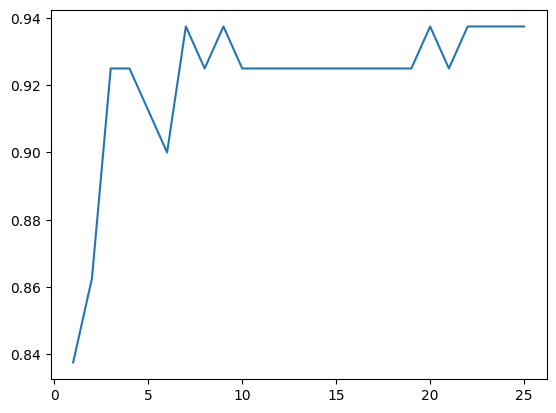

In [13]:
#Plotting i vs k
plt.plot(range(1,26),acc)

In [25]:
knn1 = KNeighborsClassifier(n_neighbors = 25)
knn1.fit(X_tr, y_tr)
yp = knn1.predict(Xt)
accuracy_score(yt,yp)

0.9375

In [26]:
def predict_output():
  age = int(input('Enter the age: '))
  salary = int(input('Enter the salary: '))
  x_new = np.array([[age],[salary]]).reshape(1,2)
  x_new = scaler.transform(x_new)
  if knn1.predict(x_new)[0] == 0:
    return "Will not Purchase"
  else:
    return "Will Purchase"

In [27]:
predict_output()

Enter the age: 27
Enter the salary: 240000


'Will Purchase'

In [28]:
a = np.arange(start = X_tr[:,0].min()-1, stop = X_tr[:,0].max()+1, step = 0.01)
b = np.arange(start = X_tr[:,1].min()-1, stop = X_tr[:,1].max()+1, step = 0.01)
XX, YY = np.meshgrid(a,b)

In [29]:
XX.shape

(593, 613)

In [37]:
arr = np.array([XX.ravel(),YY.ravel()]).T

In [38]:
knn1.predict(arr)

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
labels = knn1.predict(arr)
labels

array([0, 0, 0, ..., 1, 1, 1])

As we Increase the value of K the smoothness of Decision Boundary/Surface increases

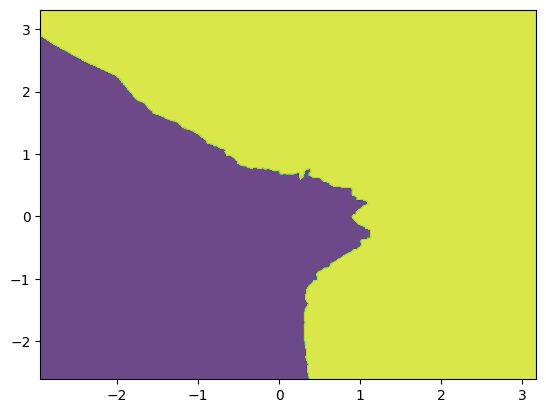

In [51]:
# Decision Boundary
plt.contourf(XX,YY,labels.reshape(XX.shape), cmap='viridis',alpha =0.8)

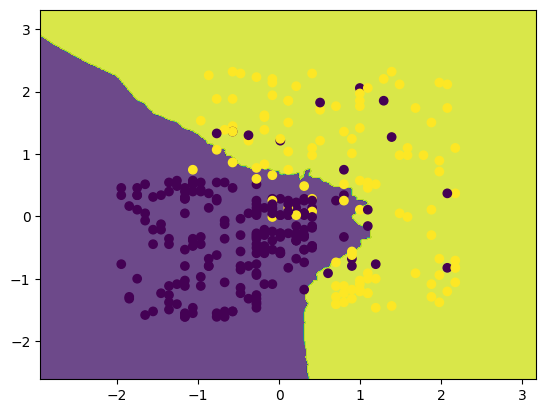

In [52]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha = 0.8)
plt.scatter(X_tr[:,0],X_tr[:,1],c = y_tr)

In [55]:
# Effect of k on training error and validation error rate
error_train = []
error_test = []

for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_tr, y_tr)
  x = confusion_matrix(y_tr, knn.predict(X_tr))
  y = confusion_matrix(yt, knn.predict(Xt))
  error_train.append((x[0][1]+x[1][0])/x.sum())
  error_test.append((y[0][1]+y[1][0])/y.sum())

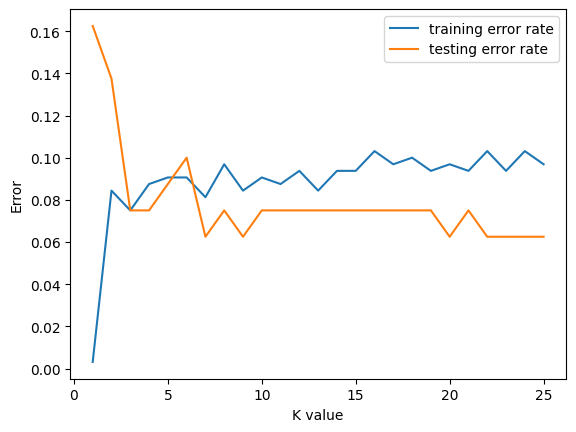

In [56]:
plt.plot(range(1,26),error_train, label = 'training error rate')
plt.plot(range(1,26),error_test, label = 'testing error rate')
plt.xlabel('K value')
plt.ylabel('Error')
plt.legend()